# Cluster Analysis of Roller Coaster Data

The file **rollerCoaster.RData** was obtained from a University website.

The following gives a data dictionary for the dataframe `rollerCoaster`.

* `speed` - the maximum speed of the roller coaster, measured in miles per hour (mph) and given to one decimal place
* `height` - the height of the roller coaster, measured in feet (ft) and given to two decimal places
* `length` - the length of the roller coaster, also measured in feet and given to two decimal places.

In [2]:
# load dataframe
load("rollerCoaster.RData")

#Check what dataframes have loaded
ls()

[1] "rollerCoaster"

In [3]:
str(rollerCoaster)

'data.frame':	91 obs. of  3 variables:
 $ speed : num  95 95 93 90 85 85 83.3 83 82 82 ...
 $ height: num  325 318 310 305 245 ...
 $ length: num  6602 8133 6595 5100 5312 ...


## Standardising the variables

In [4]:
# Display fix six values
head(rollerCoaster)

speed,height,length
95,325.00,6602.0
95,318.25,8133.1
93,310.00,6595.0
90,305.00,5100.0
85,245.00,5312.0
85,235.00,4500.0


The question tells us height & length are both measured in feet, whereas the speed vector is measured in miles per hour. Cluster analysis is sensitive to difference in SI units because we are trying to see which values are close to each other. If they are measured in different units then depending on the features of the measuring system being used for each vector, they could look to be quite far apart when in fact they are actually close to each other. Therefore it is best to standardise the data to ensure this doesn't affect our analysis when looking a dissimilarities between the data.

In [5]:
# standardise the data
zRoCo <- scale(rollerCoaster)

#Check the calcs
head(zRoCo)

speed,height,length
1.631042,2.227465,2.080264
1.631042,2.146891,2.844553
1.546839,2.048412,2.076770
1.420535,1.988728,1.330501
1.210027,1.272516,1.436326
1.210027,1.153147,1.030995


## Data Visualisation

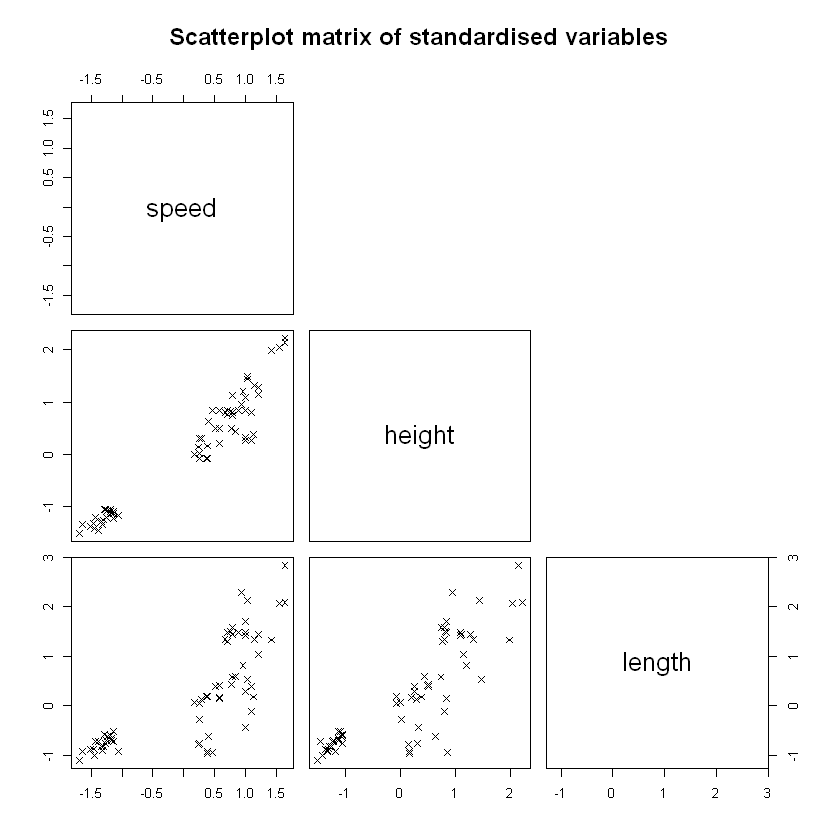

In [6]:
pairs(zRoCo, main = "Scatterplot matrix of standardised variables", upper.panel=NULL, pch = 4)

In the scatter plot of speed vs height there appears to be 3 clusters visible with decent spacing between them.

In the scatterplot of speed vs length you could argue there were up 7 clusters visible but it is very hard to tell in this scatterplot. There is one clear cluster in the two lowest values of the values, the rest is subjective.

In the scatterplot of height vs length there looks to be maybe 5 clusters in this scatter plot. The one at the lowest values is present again, the top most values could be a cluster on its own and there is definitely spacing in between the clusters between these values but again its quite subjective.

So for the last two plots it's fairly inconclusive using only a scatterplot matrix.

## Cluster Analysis

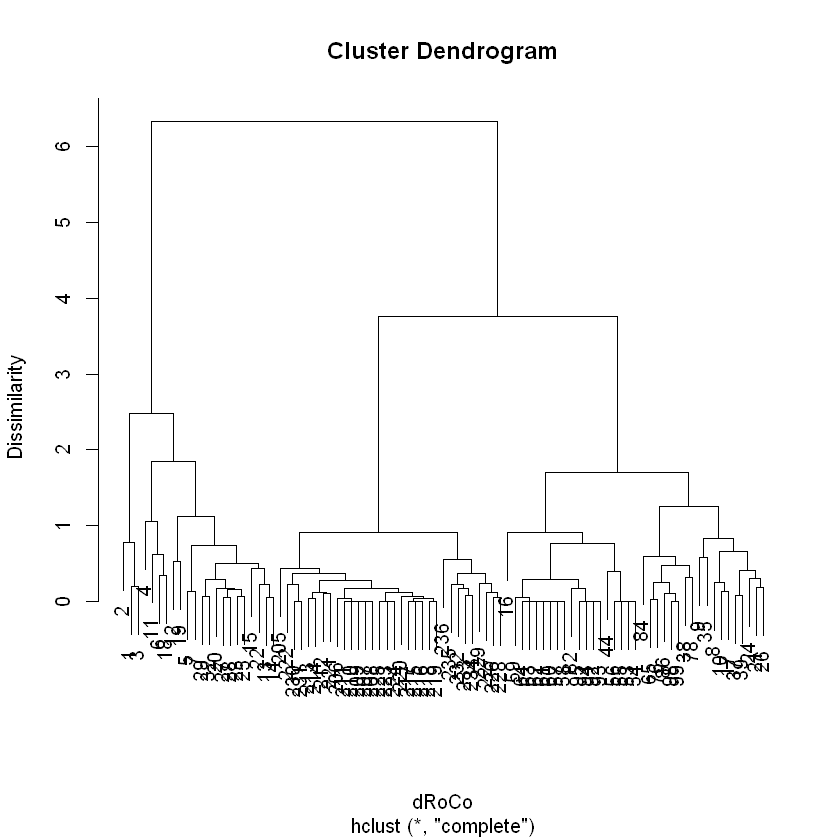

In [7]:
# calc dissimilarities
dRoCo <- dist(zRoCo) 

# hierachal clustering using complete linkage
RoCoClust <- hclust(dRoCo) 

# plot dendrogram
plot(RoCoClust, ylab = "Dissimilarity")

In [8]:
# Find mean silhouette stats for k = 2 to 5

for (k in 2:5)
{  
kmroco <- kmeans(zRoCo, k)                     
kmsil <- silhouette(zRoCo, kmroco$cluster)    
print(mean(kmsil))                                   
}

[1] 0.519243
[1] 0.6747517
[1] 0.6398635
[1] 0.5010749


From these results I would estimate there are 3 clusters. 

The clustering with k = 3 is the closest value to one, meaning this has the best clustering for the data.

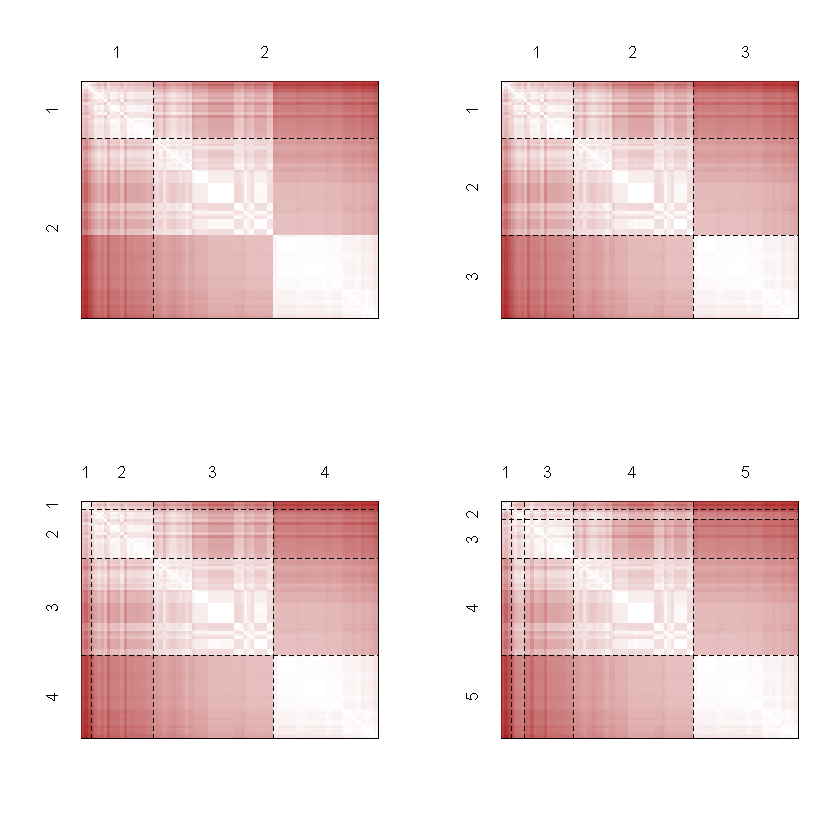

In [9]:
source('dissimPlot.r')

# cut dendrogram
clusters2 <- cutree(RoCoClust, k = 2)
clusters3 <- cutree(RoCoClust, k = 3) 
clusters4 <- cutree(RoCoClust, k = 4) 
clusters5 <- cutree(RoCoClust, k = 5) 

# plot dissimilarity plots
par(mfrow = c(2,2))

dissimPlot(dRoCo, clusters2)
dissimPlot(dRoCo, clusters3)
dissimPlot(dRoCo, clusters4)
dissimPlot(dRoCo, clusters5)

In the first two plots the blocks along the main diagonal looks much lighter than the other blocks in the matrix.

In the second two plots it is getting harder to distinguish the colours apart.

So taking into account the mean silhouette figure and the second plot I would still suggest three clusters at present.

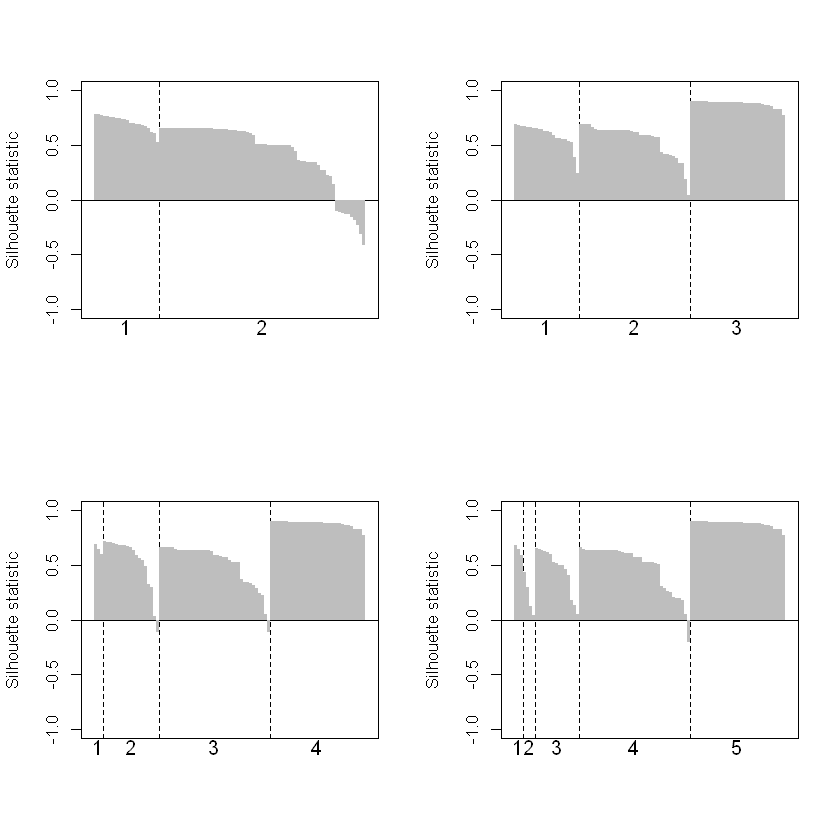

In [10]:
# create silhouette plots
silplot2 <- silhouette(zRoCo, clusters2)
silplot3 <- silhouette(zRoCo, clusters3)
silplot4 <- silhouette(zRoCo, clusters4)
silplot5 <- silhouette(zRoCo, clusters5)

par(mfrow = c(2,2))

silhouettePlot(silplot2)
silhouettePlot(silplot3)
silhouettePlot(silplot4)
silhouettePlot(silplot5)

The second silhouette plot appears to have no negative values meaning all of the observations fit well into their clusters.

The remaining plots have negative values, meaning some observations are closer to different clusters that they are in. So these clusterings are worse than when the clustering is k=3. 

So taking all into account so far I would still think three clusters is the most appropriate choice.

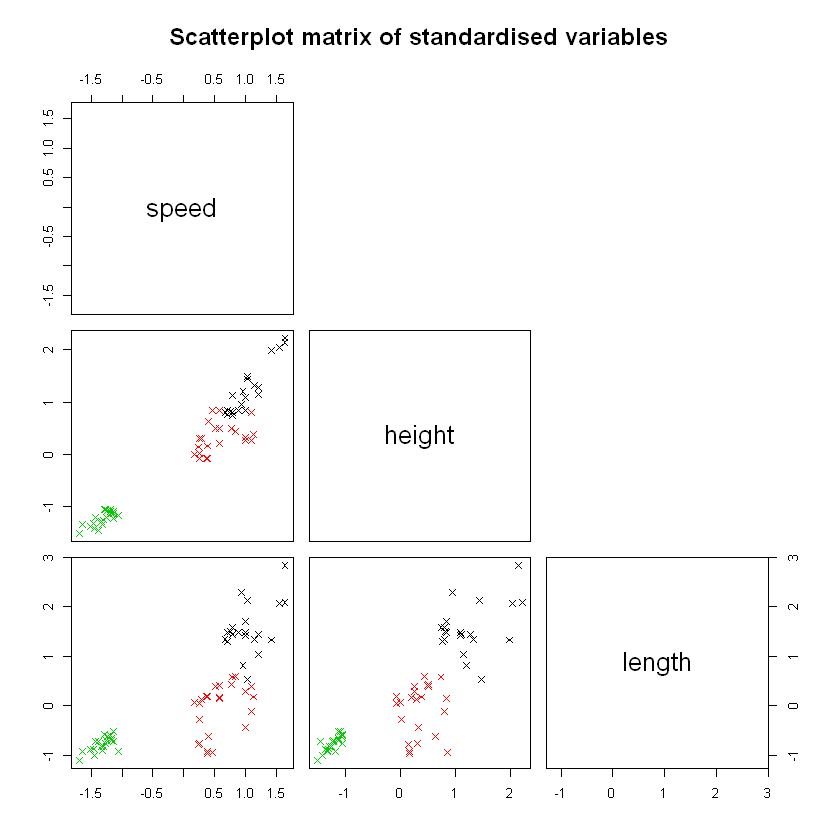

In [11]:
pairs(zRoCo, main = "Scatterplot matrix of standardised variables", upper.panel=NULL, pch = 4, col = clusters3)

The scatterplot above shows us the three clusters with the groups. The green cluster which we saw in the earlier uncoloured scatterplot is clearly evident in all three plots being at the lower most values for all three variables.

The black cluster with the higher values in the height vs length plot is clearly separated from the other two clusters.

However in the other two plots there is overlap between these two clusters so it was harder to distinguish when we could not see the colours.